#Your project
You need to train a fully connected neural network to predict the cross section (data_y.csv) using data_x.csv as input. Equivalently, you can work on data_x_y.csv which contains the column of data_y.csv together with data_x.csv.

Please separate your file, data_x_y.csv, in training and validation data so that you can train your model on training data and check the performance on the validation data (make sure that the column cross_section is removed from your input). You need to work on the architecture you will chose and on the hyperparameter you will chose. Look at the quality of the prediction on the validation data and work at finding better hyperparameters. Iterate this loop until you are happy with your predictions.  

After training your neural network on your training set, you need to make a prediction on the following file data40_x.csv which is of shape (1410,9) for which you do not have the associated cross sections.

Your submission will be composed of
* your training code,
* your code to make a prediction on data40_x.csv,
* your prediction results needs to be named data40_y.csv and of shape (1410,) it will contain 1410 floats that are predictions of the cross section.  

Your mark will depend on the quality of your code and comments in the code and also on the prediction you manage to make on the file data40_x.csv.


# 1) Load libraries and drive
The files you will need to use are


*   data_x.csv
*   data_y.csv
*   data_x_y.csv
*   data40_x.csv



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import save,load,ceil
import pandas as pd

"""from google.colab import drive
drive.mount('/content/drive')
filedrive="/content/drive/My Drive/ProjectMa512/""""

Mounted at /content/drive


# 2) Importing data from csv files
You will work on predicting the cross section of an electron beam colliding into different nucleus.
* The cross section is the column named "cross_section" in df_x_y or equivalently, the column of df_y,
* the features that will allow the neural network to make the prediction are the column of df_x.

In [ ]:
df_x = pd.read_csv("data_x.csv")  # Input of your neural network
df_y = pd.read_csv("data_y.csv")  # Output of your neural network to predict. This is called cross_section
df_x_y = pd.read_csv("data_x_y.csv") #The csv file

# 3) Visualizing the shape of the training input data

In [ ]:
print("df_x.shape",df_x.shape)
df_x.head()

df_x.shape (10862, 9)


,Z,A,E,Theta,omega,E_omega,cos_Theta,E_ela,E_inela
0,2,4,0.15,60.0,0.020,0.01950,0.5,0.011088,0.324102
1,2,4,0.15,60.0,0.025,0.01875,0.5,0.011088,0.324102
2,2,4,0.15,60.0,0.030,0.01800,0.5,0.011088,0.324102
3,2,4,0.15,60.0,0.035,0.01725,0.5,0.011088,0.324102
4,2,4,0.15,60.0,0.040,0.01650,0.5,0.011088,0.324102


# 4) Visualizing the shape of the training ouput data

In [ ]:
print("df_y.shape",df_y.shape)
df_y.head()

df_y.shape (10862, 1)


,cross_section
0,6600.0
1,8242.5
2,12422.5
3,12080.0
4,10205.0


 #Visualizing the shape of the training input and ouput data together.
 The ouput data is cross_section, this is the variable your neural network has to predict. You have 10862 input-output learning examples.

In [ ]:
print("df_x_y.shape",df_x_y.shape)
df_x_y.head()

df_x_y.shape (10862, 10)


,Z,A,E,Theta,omega,cross_section,E_omega,cos_Theta,E_ela,E_inela
0,2,4,0.15,60.0,0.020,6600.0,0.01950,0.5,0.011088,0.324102
1,2,4,0.15,60.0,0.025,8242.5,0.01875,0.5,0.011088,0.324102
2,2,4,0.15,60.0,0.030,12422.5,0.01800,0.5,0.011088,0.324102
3,2,4,0.15,60.0,0.035,12080.0,0.01725,0.5,0.011088,0.324102
4,2,4,0.15,60.0,0.040,10205.0,0.01650,0.5,0.011088,0.324102


# 5) Here is a function to visualize the training data.
For a given value of Z (the atomic number), the following function represents the cross section as a function of omega for a given value of E and Theta. You can compare your prediction to these values.

In [ ]:
def visu_func(ZZ):
  dfr=df_x_y
  df=df_x_y
  show_pred=False
  dfZ=df[(df.Z==ZZ)]
  dfrZ=dfr[(dfr.Z==ZZ)]
  nA = len(dfZ["A"].value_counts().index)
  nTheta = len(dfZ["Theta"].value_counts().index)
  nomega = len(dfZ["omega"].value_counts().index)
  nE = len(dfZ["E"].value_counts().index)
  print("nA=",nA,"nTheta=",nTheta,"nomega=",nomega,"nE=",nE)
  ntotal=0
  for i in range(nTheta):
    val=dfZ["Theta"].value_counts().index[i]
    dfE=dfZ[(dfZ.Theta==val)]
    nE_for_one_Theta=len(dfE["E"].value_counts().index)
    ntotal=ntotal+nE_for_one_Theta

  nrow=int(ceil(ntotal**0.5))
  print("ntotal=",ntotal)

  fig, axs = plt.subplots(nrow, nrow, figsize=(20,20))
  count=0
  for i in range(nTheta):
      Theta=dfZ["Theta"].value_counts().index[i]
      dfE=dfZ[(dfZ.Theta==Theta)]
      dfrE=dfrZ[(dfrZ.Theta==Theta)]
      nE=len(dfE["E"].value_counts().index)
      for j in range(nE):
        E=dfE["E"].value_counts().index[j]
        i1=count%nrow
        i2=count//nrow
        axs[i1,i2].plot(dfE[(dfE.E == E)].omega, dfE[(dfE.E == E)].cross_section,"oy",markersize=8)
        if show_pred: axs[i1,i2].plot(dfE[(dfE.E == E)].omega, dfE[(dfE.E == E)].pred,"om",markersize=3)
        axs[i1,i2].set_title('Th={Theta_title:.2f}  E={E_title:.3f}'.format(Theta_title=Theta,E_title=E), fontsize=12)
        count=count+1
  plt.subplots_adjust( wspace=0.4,hspace=0.4)
  plt.show()

# 6) Visualizing the data

###The existing values of Z in the training set are the following.

In [ ]:
print("df_x_y[Z].value_counts()=",df_x_y["Z"].value_counts())

df_x_y[Z].value_counts()= 6     2948
2     2717
26    2429
20    1216
13     714
4      390
3      165
8      126
22      86
28      37
12      34
Name: Z, dtype: int64


nA= 1 nTheta= 4 nomega= 79 nE= 3
ntotal= 4


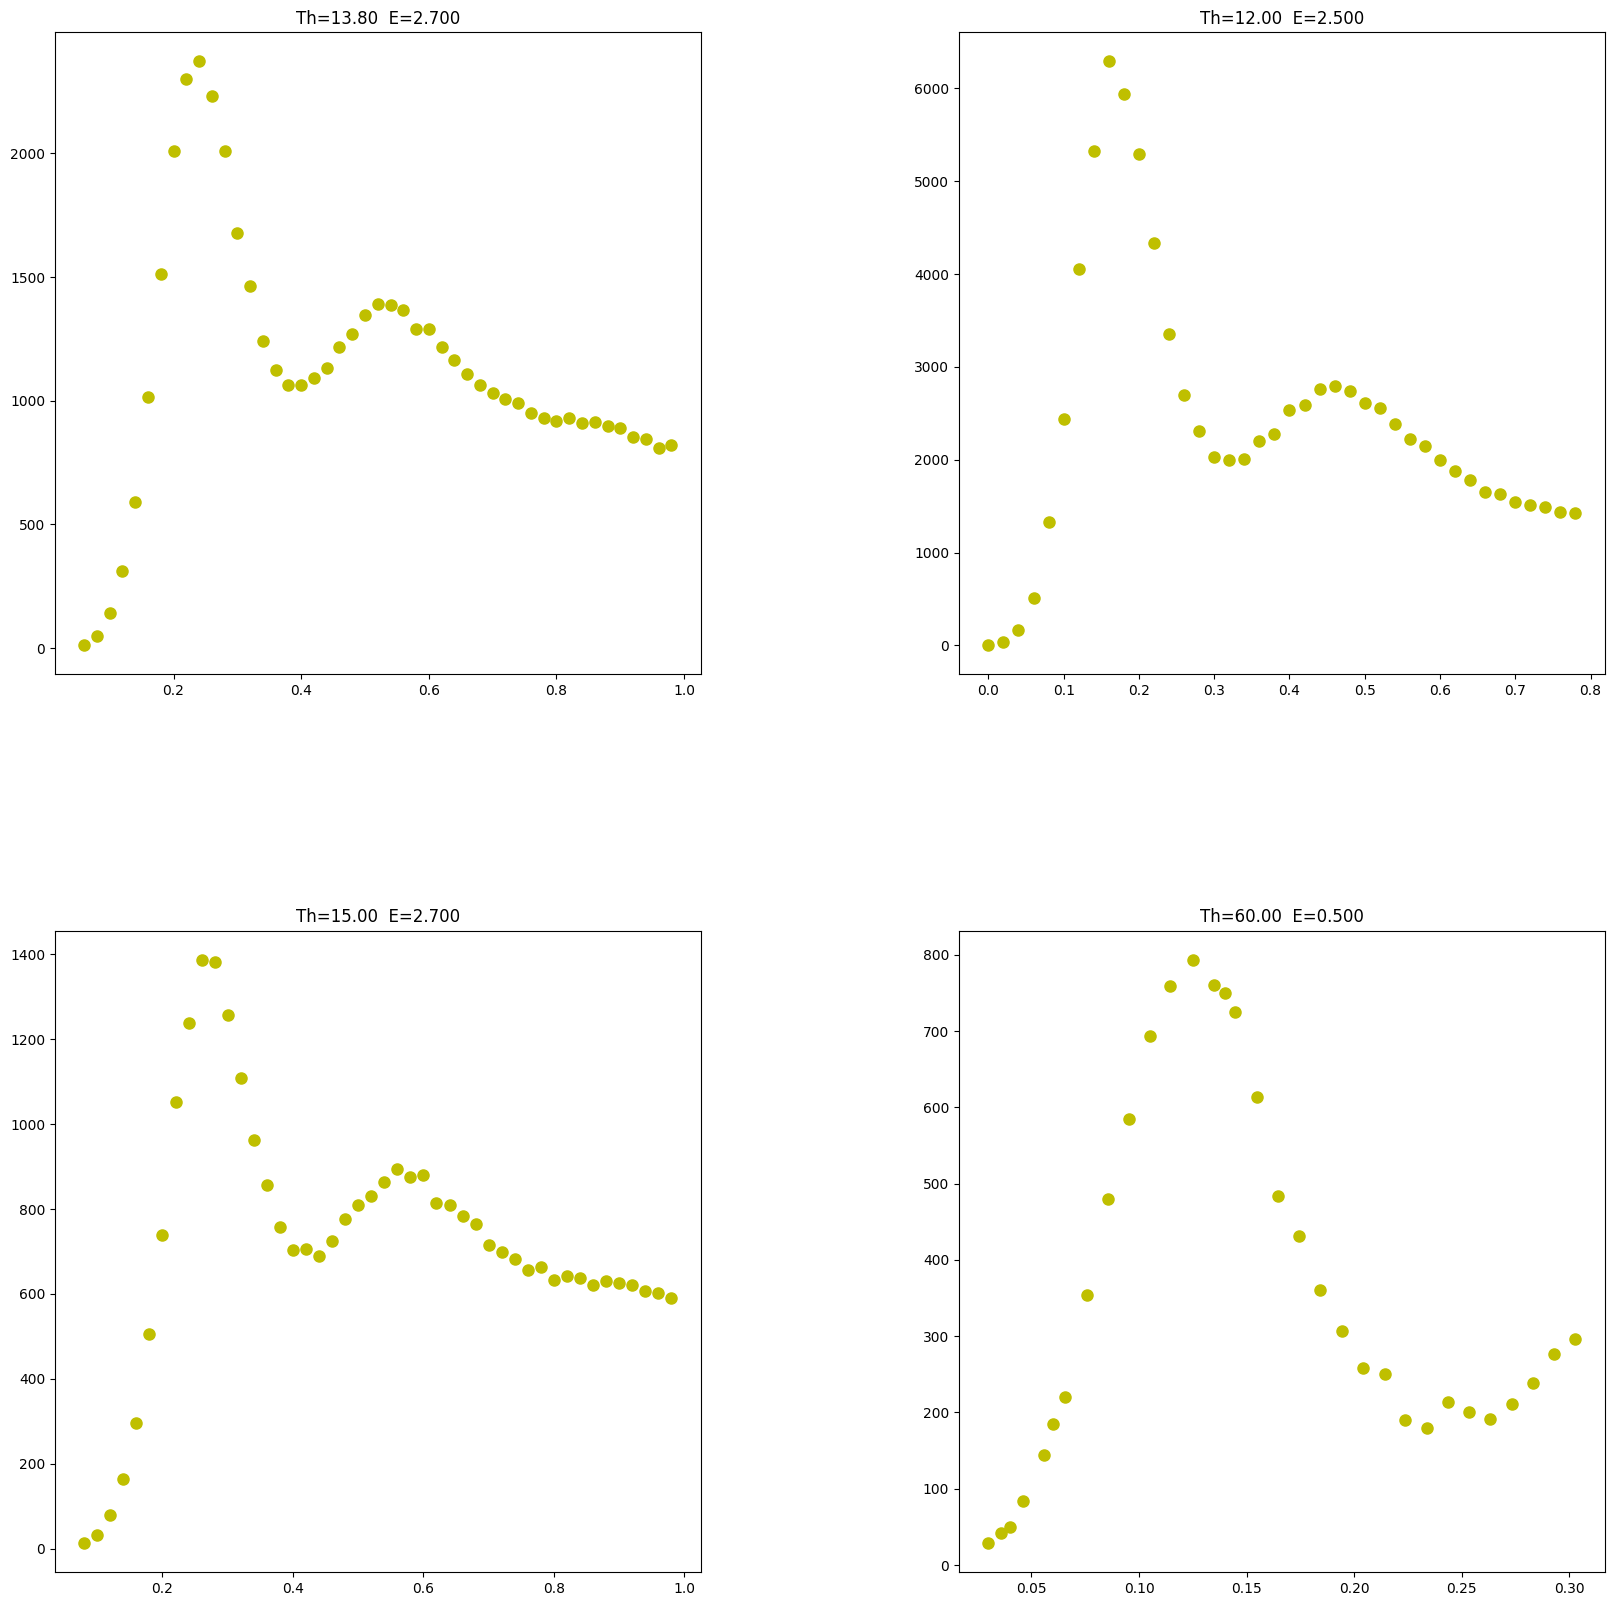

In [ ]:
ZZ=2
visu_func(ZZ)

nA= 1 nTheta= 4 nomega= 79 nE= 3
ntotal= 4


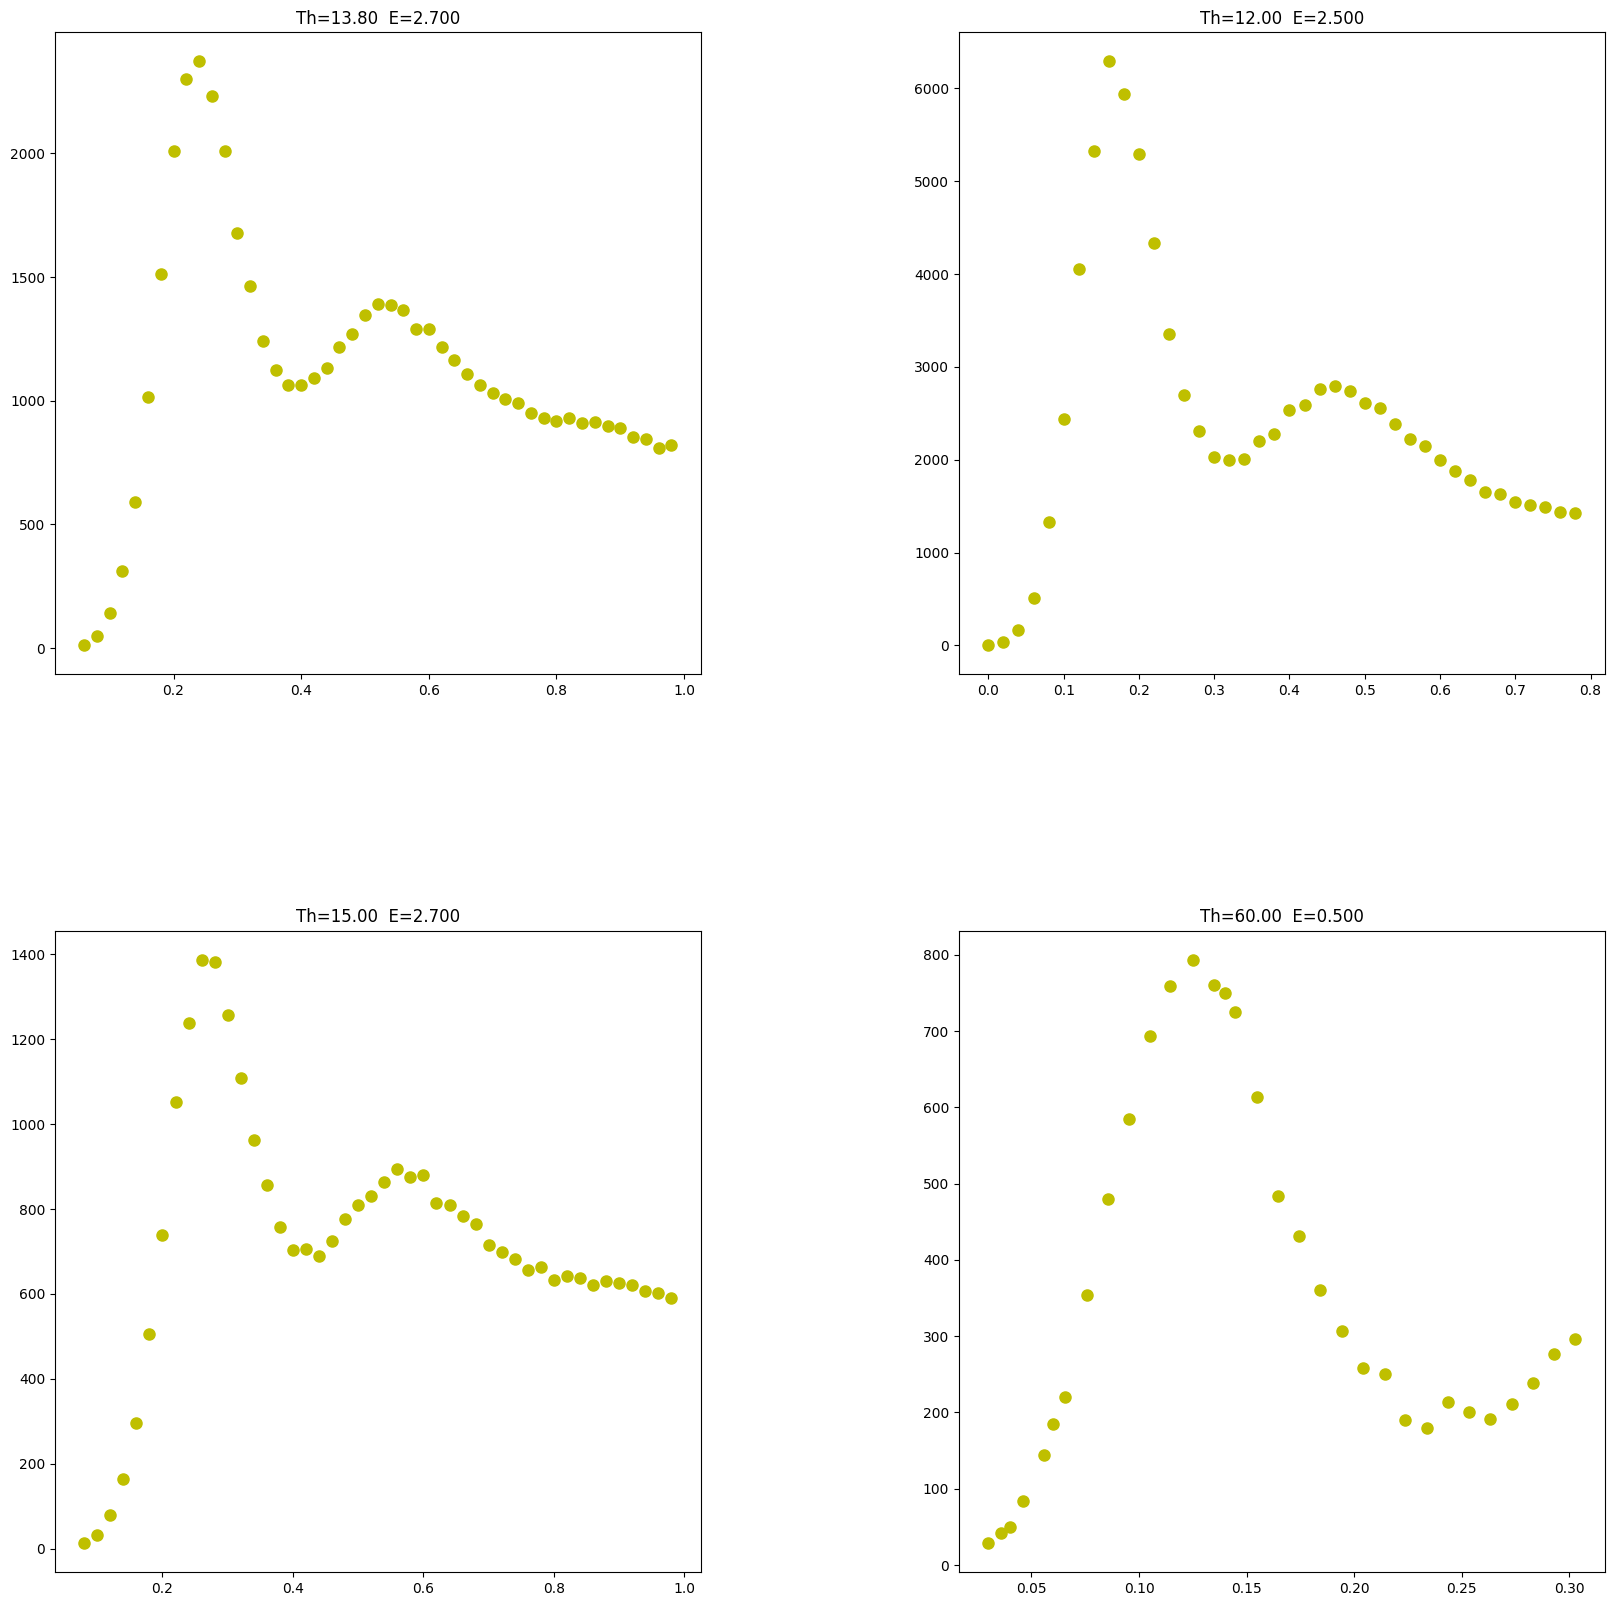

In [ ]:
ZZ=3
visu_func(ZZ)

nA= 1 nTheta= 7 nomega= 389 nE= 2
ntotal= 7


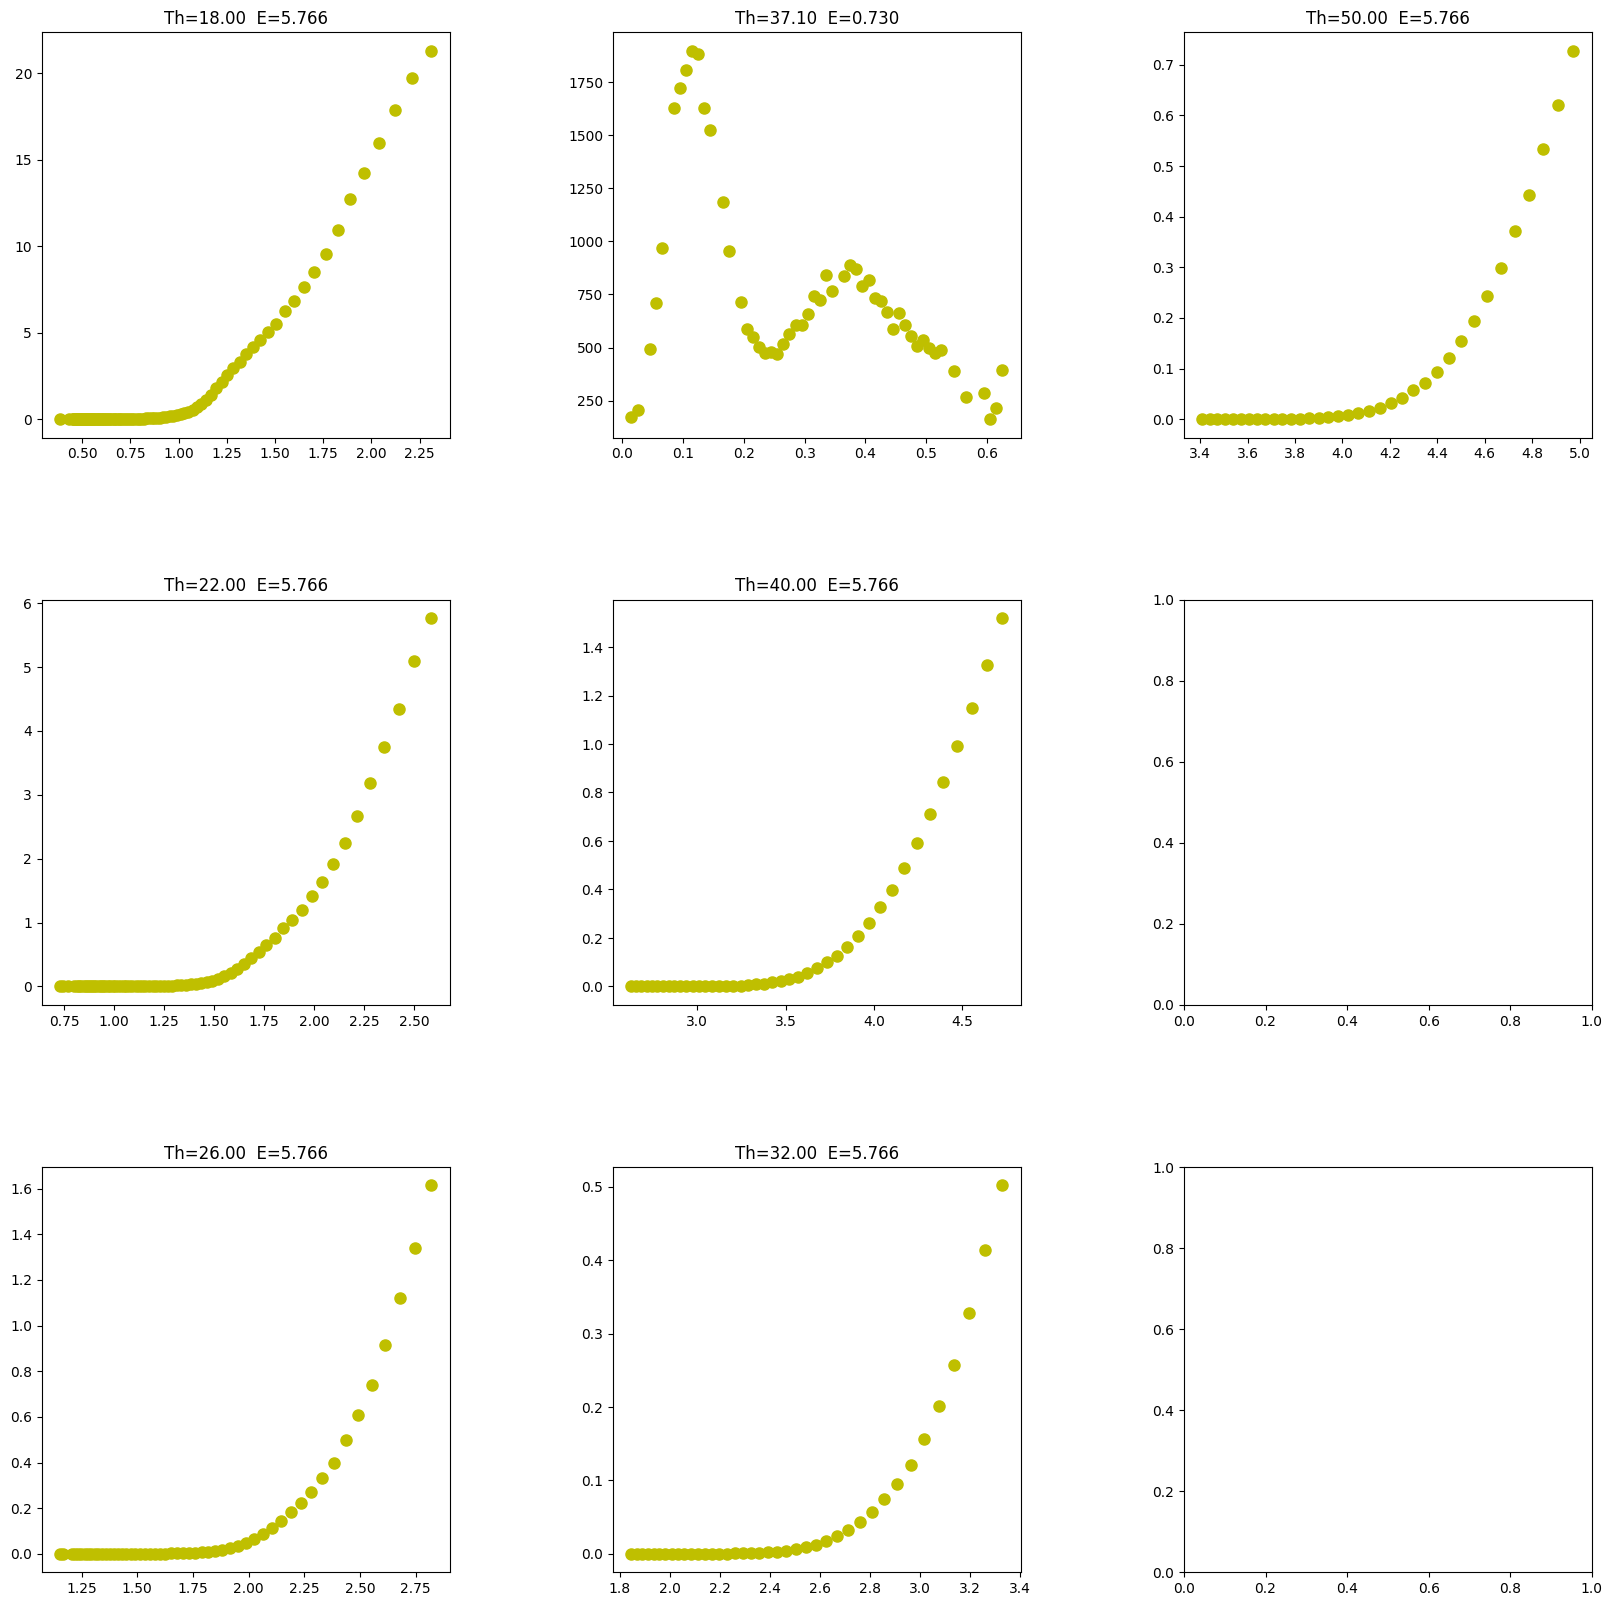

In [ ]:
ZZ=4
visu_func(ZZ)